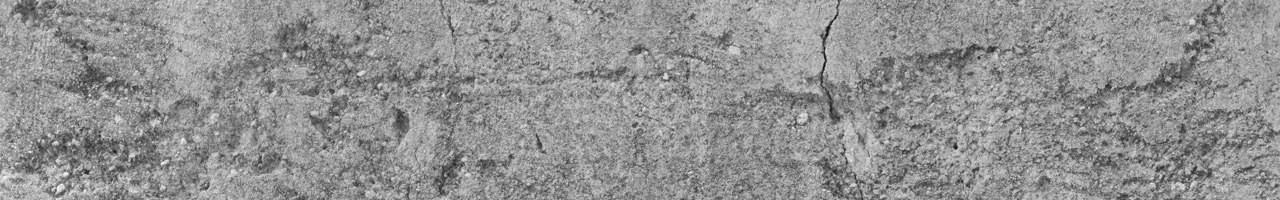

# Predicting Compressive Strength of Concrete
## Project Level 1 (Exploratory Data Analysis)

# 🏗️ Concrete Compressive Strength — Exploratory Data Analysis (EDA)

This project explores the factors influencing the compressive strength of concrete using exploratory data analysis (EDA).  
The goal is to understand data distributions, relationships between variables, the presence of outliers, and potential preprocessing steps required before modeling.

**Dataset:** Concrete Compressive Strength  
**Rows:** 1030  
**Features:** Cement, Slag, Fly Ash, Water, Superplasticizer, Aggregates, Age, Strength  


## 🎯 Project Objectives

The objectives of this analysis are to:

- Understand the distribution of each numerical feature
- Identify skewness and outliers in the dataset
- Examine relationships between material components and concrete strength
- Detect multicollinearity using correlation analysis
- Prepare the dataset for future predictive modeling


## 📊 Dataset Description

The dataset contains measurements of concrete components and their corresponding compressive strength.

| Feature | Description |
|------|------|
| Cement | Cement content (kg/m³) |
| Slag | Blast furnace slag (kg/m³) |
| Ash | Fly ash content (kg/m³) |
| Water | Water content (kg/m³) |
| Superplasticizer | Chemical admixture (kg/m³) |
| Coarse Aggregate | Coarse aggregate content (kg/m³) |
| Fine Aggregate | Fine aggregate content (kg/m³) |
| Age | Age of concrete (days) |
| Strength | Compressive strength (MPa) |


In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
#loading in the dataset
df = pd.read_excel(r"C:\Users\Umar\Downloads\Concrete_Data.xls")

df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Column renaming for increased readability
The original dataset contains column names that are relatively long and cumbersome to use repeatedly in code. To improve readability, reduce the likelihood of errors, and make the analysis workflow more efficient, I renamed the columns using shorter, clearer, and more consistent labels.

This renaming step does not alter the underlying data or its meaning; it simply improves code workability and maintainability throughout the analysis and modeling process

In [3]:
for col in df:
    print(repr(col))

'Cement (component 1)(kg in a m^3 mixture)'
'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'
'Fly Ash (component 3)(kg in a m^3 mixture)'
'Water  (component 4)(kg in a m^3 mixture)'
'Superplasticizer (component 5)(kg in a m^3 mixture)'
'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'
'Fine Aggregate (component 7)(kg in a m^3 mixture)'
'Age (day)'
'Concrete compressive strength(MPa, megapascals) '


In [4]:
# Renaming the Columns

df = df.rename(
    columns = {
        'Cement (component 1)(kg in a m^3 mixture)' : 'cement',
        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'slag',
        'Fly Ash (component 3)(kg in a m^3 mixture)' : 'ash',
        'Water  (component 4)(kg in a m^3 mixture)' : 'water',
        'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'superplasticizer',
        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'coarseagg',
        'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'fineagg',
        'Age (day)' : 'age',
        'Concrete compressive strength(MPa, megapascals) ' : 'strength'
    }
)

df.head()

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
# This gives me the types of data that is contained in each columns

df.dtypes

cement              float64
slag                float64
ash                 float64
water               float64
superplasticizer    float64
coarseagg           float64
fineagg             float64
age                   int64
strength            float64
dtype: object

In [6]:
# This line of code outputs a tuple containing the number of rows and columns contained in the dataset.
# This basically gives me the overall idea of how large the data I am working with is.
df.shape

(1030, 9)

In [7]:
# This gives me the number of cells contained in the dataset.
df.size

9270

In [8]:
# This gives me the number of null or missing values in each columns of the dataset.

df.isnull().sum()

cement              0
slag                0
ash                 0
water               0
superplasticizer    0
coarseagg           0
fineagg             0
age                 0
strength            0
dtype: int64

In [9]:
# This gets me the overall idea of the data variation

df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarseagg,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fineagg,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


# Eploratory Data Analysis

## 🔍 Univariate Analysis

Univariate analysis focuses on examining each variable individually to understand its distribution, spread, and the presence of outliers.  
This step helps identify skewness, extreme values, and potential data quality issues before moving to multivariate analysis or modeling.

### 📦 Outlier Detection Using the IQR Method

Outliers are identified using the Interquartile Range (IQR) method:

- **Q1 (25th percentile)** and **Q3 (75th percentile)** define the central spread
- **IQR = Q3 − Q1**
- Lower bound = Q1 − 1.5 × IQR
- Upper bound = Q3 + 1.5 × IQR

Values outside these bounds are considered potential outliers.


In [10]:
#importing the statistics library

from scipy import stats

#### Cement

In [11]:
Q1 = df["cement"].quantile(q = 0.25)
Q3 = df["cement"].quantile(q = 0.75)
Qint = stats.iqr(df['cement'])
print("The first quartile Q1 is: ", Q1)
print('The second quartile Q3 is: ', Q3)
print('The interquartile range is : ', Qint)

The first quartile Q1 is:  192.375
The second quartile Q3 is:  350.0
The interquartile range is :  157.625


In [12]:
L_outlier = Q1 - (1.5 * Qint)
U_outlier = Q3 + (1.5 * Qint)

print("The lower outlier limit in cement: ", L_outlier)
print("The upper outlier limit in cement: ", U_outlier)

The lower outlier limit in cement:  -44.0625
The upper outlier limit in cement:  586.4375


In [13]:
lout = (df.cement < L_outlier).sum()
uout = (df.cement > U_outlier).sum()
plout = round(lout / len(df.cement), 3) * 100
puout = round(uout / len(df.cement), 3) * 100

print("The number of lower outliers in cement is ", lout)
print("The number of upper outliers in cement is ", uout)
print("The % of lower outliers is ", plout,'%')
print("The % of upper outliers is ", puout,'%')

The number of lower outliers in cement is  0
The number of upper outliers in cement is  0
The % of lower outliers is  0.0 %
The % of upper outliers is  0.0 %


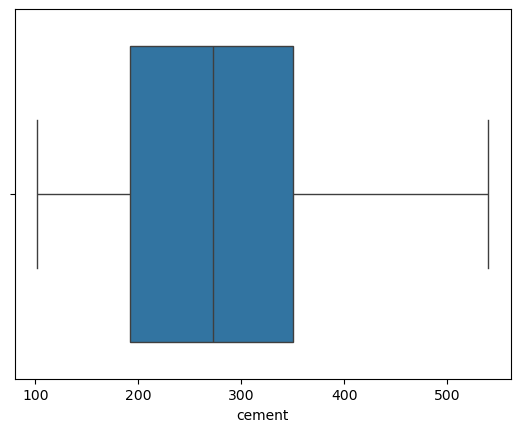

In [14]:
sns.boxplot(x='cement', data=df, orient='h')
plt.show()

**Observations:**
- The distribution shows that there are no outliers.
- The median position suggests a normal distribution.
- The spread indicates moderate variability in this feature.


#### Water

In [15]:
wq1 = df.water.quantile(q = 0.25)
wq3 = df.water.quantile(q = 0.75)
wiqr = stats.iqr(df.water)

print("The first quartile Q1 is: ", wq1)
print('The second quartile Q3 is: ', wq3)
print('The interquartile range is : ', wiqr)

The first quartile Q1 is:  164.9
The second quartile Q3 is:  192.0
The interquartile range is :  27.099999999999994


In [16]:
w_lout = wq1 - 1.5 * wiqr
w_uout = wq3 + 1.5 * wiqr

In [17]:
wlout = df[df.water < w_lout]['water'].count()
wuout = df[df.water > w_uout]['water'].count()

print("The number of lower outliers in water is ", wlout)
print("The number of upper outliers in water is ", wuout)

The number of lower outliers in water is  5
The number of upper outliers in water is  4


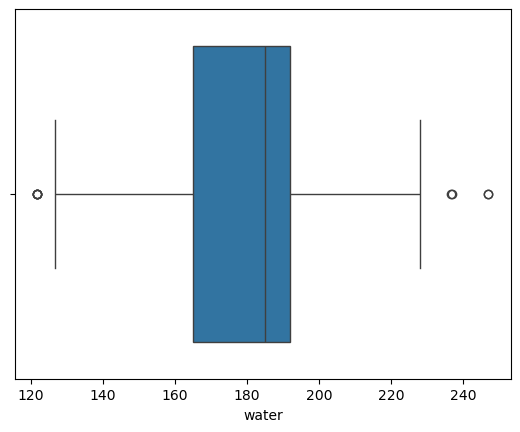

In [18]:
sns.boxplot( x='water', data=df, orient='h')
plt.show()

**Observations:**
- The distribution shows the presence of lower and upper outliers.
- The median position suggests a right-skewed distribution.
- The spread indicates moderate variability in this feature.



#### Slag

In [19]:


sq1 = df.slag.quantile(q = 0.25)
sq3 = df.slag.quantile(q = 0.75)
siqr = stats.iqr(df.slag)

print("The first quartile Q1 is: ", sq1)
print('The second quartile Q3 is: ', sq3)
print('The interquartile range is : ', siqr)

The first quartile Q1 is:  0.0
The second quartile Q3 is:  142.95
The interquartile range is :  142.95


In [20]:
s_lout = sq1 - 1.5 * siqr
s_uout = sq3 + 1.5 * siqr

In [21]:
slout = df[df.slag < s_lout]['slag'].count()
suout = df[df.slag > s_uout]['slag'].count()

print("The number of lower outliers in slag is ", slout)
print("The number of upper outliers in slag is ", suout)

The number of lower outliers in slag is  0
The number of upper outliers in slag is  2


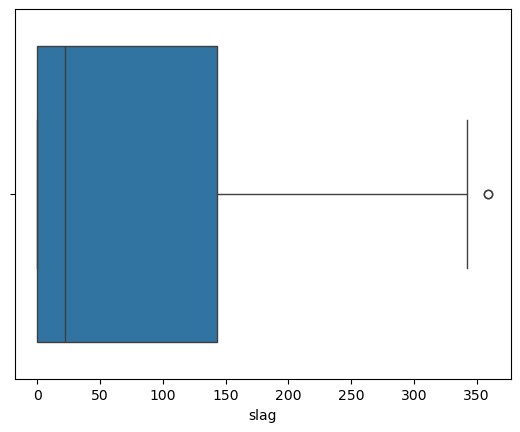

In [22]:
sns.boxplot( x='slag', data=df, orient='h')
plt.show()

**Observations:**
- The distribution shows the presence of upper outliers.
- The median position suggests a left-skewed distribution.
- The spread indicates high variability in this feature.


#### Ash

In [23]:
aq1 = df.ash.quantile(q = 0.25)
aq3 = df.ash.quantile(q = 0.75)
aiqr = stats.iqr(df.ash)

print("The first quartile Q1 is: ", aq1)
print('The second quartile Q3 is: ', aq3)
print('The interquartile range is : ', aiqr)

The first quartile Q1 is:  0.0
The second quartile Q3 is:  118.27
The interquartile range is :  118.27


In [24]:
a_lout = aq1 - 1.5 * aiqr
a_uout = aq3 + 1.5 * aiqr

In [25]:
alout = df[df.ash < a_lout]['ash'].count()
auout = df[df.ash > a_uout]['ash'].count()

print("The number of lower outliers in ash is ", alout)
print("The number of upper outliers in ash is ", auout)

The number of lower outliers in ash is  0
The number of upper outliers in ash is  0


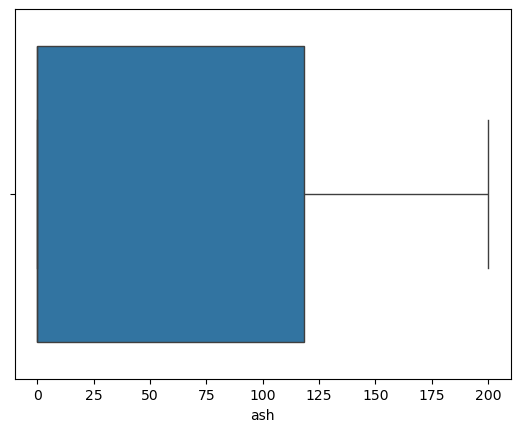

In [26]:
sns.boxplot( x='ash', data=df, orient='h')
plt.show()

**Observations:**
- The distribution shows there are no outliers present in this feature.
- The median position suggests a left-skewed distribution.
- The spread indicates high variability in this feature.


#### Superplasticizer

In [27]:
spq1 = df.superplasticizer.quantile(q = 0.25)
spq3 = df.superplasticizer.quantile(q = 0.75)
spiqr = stats.iqr(df.superplasticizer)

print("The first quartile Q1 is: ", spq1)
print('The second quartile Q3 is: ', spq3)
print('The interquartile range is : ', spiqr)

The first quartile Q1 is:  0.0
The second quartile Q3 is:  10.16
The interquartile range is :  10.16


In [28]:
sp_lout = spq1 - 1.5 * spiqr
sp_uout = spq3 + 1.5 * spiqr

In [29]:
splout = df[df.superplasticizer < sp_lout]['superplasticizer'].count()
spuout = df[df.superplasticizer > sp_uout]['superplasticizer'].count()

print("The number of lower outliers in superplasticizer is ", splout)
print("The number of upper outliers in superplasticizer is ", spuout)

The number of lower outliers in superplasticizer is  0
The number of upper outliers in superplasticizer is  10


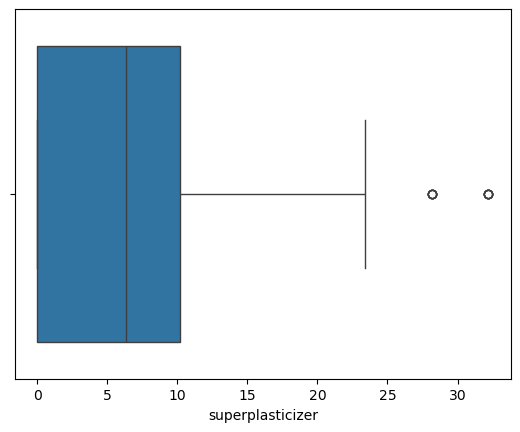

In [30]:
sns.boxplot( x='superplasticizer', data=df, orient='h')
plt.show()

**Observations:**
- The distribution shows the presence of upper outliers.
- The median position suggests a right-skewed distribution.
- The spread indicates moderate variability in this feature.


#### Coarse Aggregates

In [31]:
caq1 = df.coarseagg.quantile(q = 0.25)
caq3 = df.coarseagg.quantile(q = 0.75)
caiqr = stats.iqr(df.coarseagg)

print("The first quartile Q1 is: ", caq1)
print('The second quartile Q3 is: ', caq3)
print('The interquartile range is : ', caiqr)

The first quartile Q1 is:  932.0
The second quartile Q3 is:  1029.4
The interquartile range is :  97.40000000000009


In [32]:
ca_lout = caq1 - 1.5 * caiqr
ca_uout = caq3 + 1.5 * caiqr

In [33]:
calout = df[df.coarseagg < ca_lout]['coarseagg'].count()
cauout = df[df.coarseagg > ca_uout]['coarseagg'].count()

print("The number of lower outliers in coarseagg is ", calout)
print("The number of upper outliers in coarseagg is ", cauout)

The number of lower outliers in coarseagg is  0
The number of upper outliers in coarseagg is  0


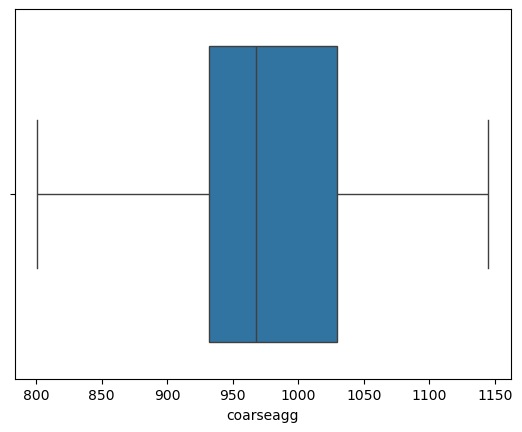

In [34]:
sns.boxplot( x='coarseagg', data=df, orient='h')
plt.show()

**Observations:**
- The distribution shows that there are no outliers present.
- The median position suggests a left-skewed distribution.
- The spread indicates moderate variability in this feature.


#### Fine Aggregates

In [35]:
faq1 = df.fineagg.quantile(q = 0.25)
faq3 = df.fineagg.quantile(q = 0.75)
faiqr = stats.iqr(df.fineagg)

print("The first quartile Q1 is: ", faq1)
print('The second quartile Q3 is: ', faq3)
print('The interquartile range is : ', faiqr)

The first quartile Q1 is:  730.95
The second quartile Q3 is:  824.0
The interquartile range is :  93.04999999999995


In [36]:
fa_lout = faq1 - 1.5 * faiqr
fa_uout = faq3 + 1.5 * faiqr

In [37]:
falout = df[df.fineagg < fa_lout]['fineagg'].count()
fauout = df[df.fineagg > fa_uout]['fineagg'].count()

print("The number of lower outliers in fineagg is ", falout)
print("The number of upper outliers in fineagg is ", fauout)

The number of lower outliers in fineagg is  0
The number of upper outliers in fineagg is  5


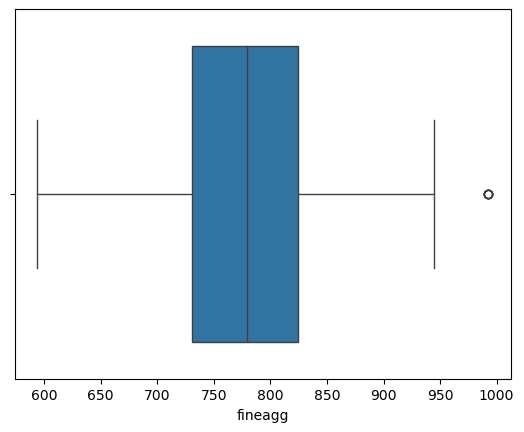

In [38]:
sns.boxplot( x='fineagg', data=df, orient='h')
plt.show()

**Observations:**
- The distribution shows the presence of upper outliers.
- The median position suggests a normal distribution.
- The spread indicates moderate variability in this feature.


#### Age

In [39]:
ageq1 = df.age.quantile(q = 0.25)
ageq3 = df.age.quantile(q = 0.75)
ageiqr = stats.iqr(df.age)

print("The first quartile Q1 is: ", ageq1)
print('The second quartile Q3 is: ', ageq3)
print('The interquartile range is : ', ageiqr)

The first quartile Q1 is:  7.0
The second quartile Q3 is:  56.0
The interquartile range is :  49.0


In [40]:
age_lout = ageq1 - 1.5 * ageiqr
age_uout = ageq3 + 1.5 * ageiqr

In [41]:
agelout = df[df.age < age_lout]['age'].count()
ageuout = df[df.age > age_uout]['age'].count()

print("The number of lower outliers in age is ", agelout)
print("The number of upper outliers in age is ", ageuout)

The number of lower outliers in age is  0
The number of upper outliers in age is  59


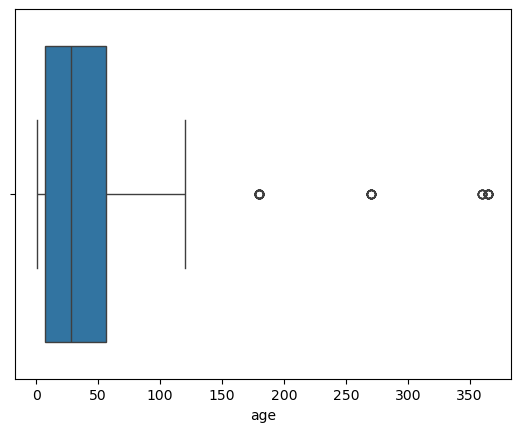

In [42]:
sns.boxplot( x='age', data=df, orient='h')
plt.show()

**Observations:**
- The distribution shows the presence of upper outliers.
- The median position suggests a left-skewed distribution.
- The spread indicates moderate variability in this feature.


### 📝 Univariate Analysis Summary

- Several features exhibit skewed distributions rather than normality.
- Outliers are present in variables such as water, superplasticizer, slag and age.
- Aggregate-related features show relatively stable distributions.
- These observations inform the choice of outlier handling and feature preprocessing strategies.


## 📈 Feature Distributions

To understand the shape and spread of each variable, distribution plots are used.  
These plots help identify skewness, multimodality, and potential outliers.

### 📈 Distribution of Individual Features

Distribution plots are used to understand how values are spread across each feature.  
They help identify whether variables follow a normal distribution or are skewed, which can influence preprocessing and model choice.


In [43]:
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))

sns.histplot(df.cement, kde=True, ax=ax2[0][0])
sns.histplot(df.slag, kde=True, ax=ax2[0][1])
sns.histplot(df.ash, kde=True, ax=ax2[0][2])
sns.histplot(df.water, kde=True, ax=ax2[1][0])
sns.histplot(df.superplasticizer, kde=True, ax=ax2[1][1])
sns.histplot(df.coarseagg, kde=True, ax=ax2[1][2])
sns.histplot(df.fineagg, kde=True, ax=ax2[2][0])
sns.histplot(df.age, kde=True, ax=ax2[2][1])
sns.histplot(df.strength, kde=True, ax=ax2[2][2])

plt.tight_layout()


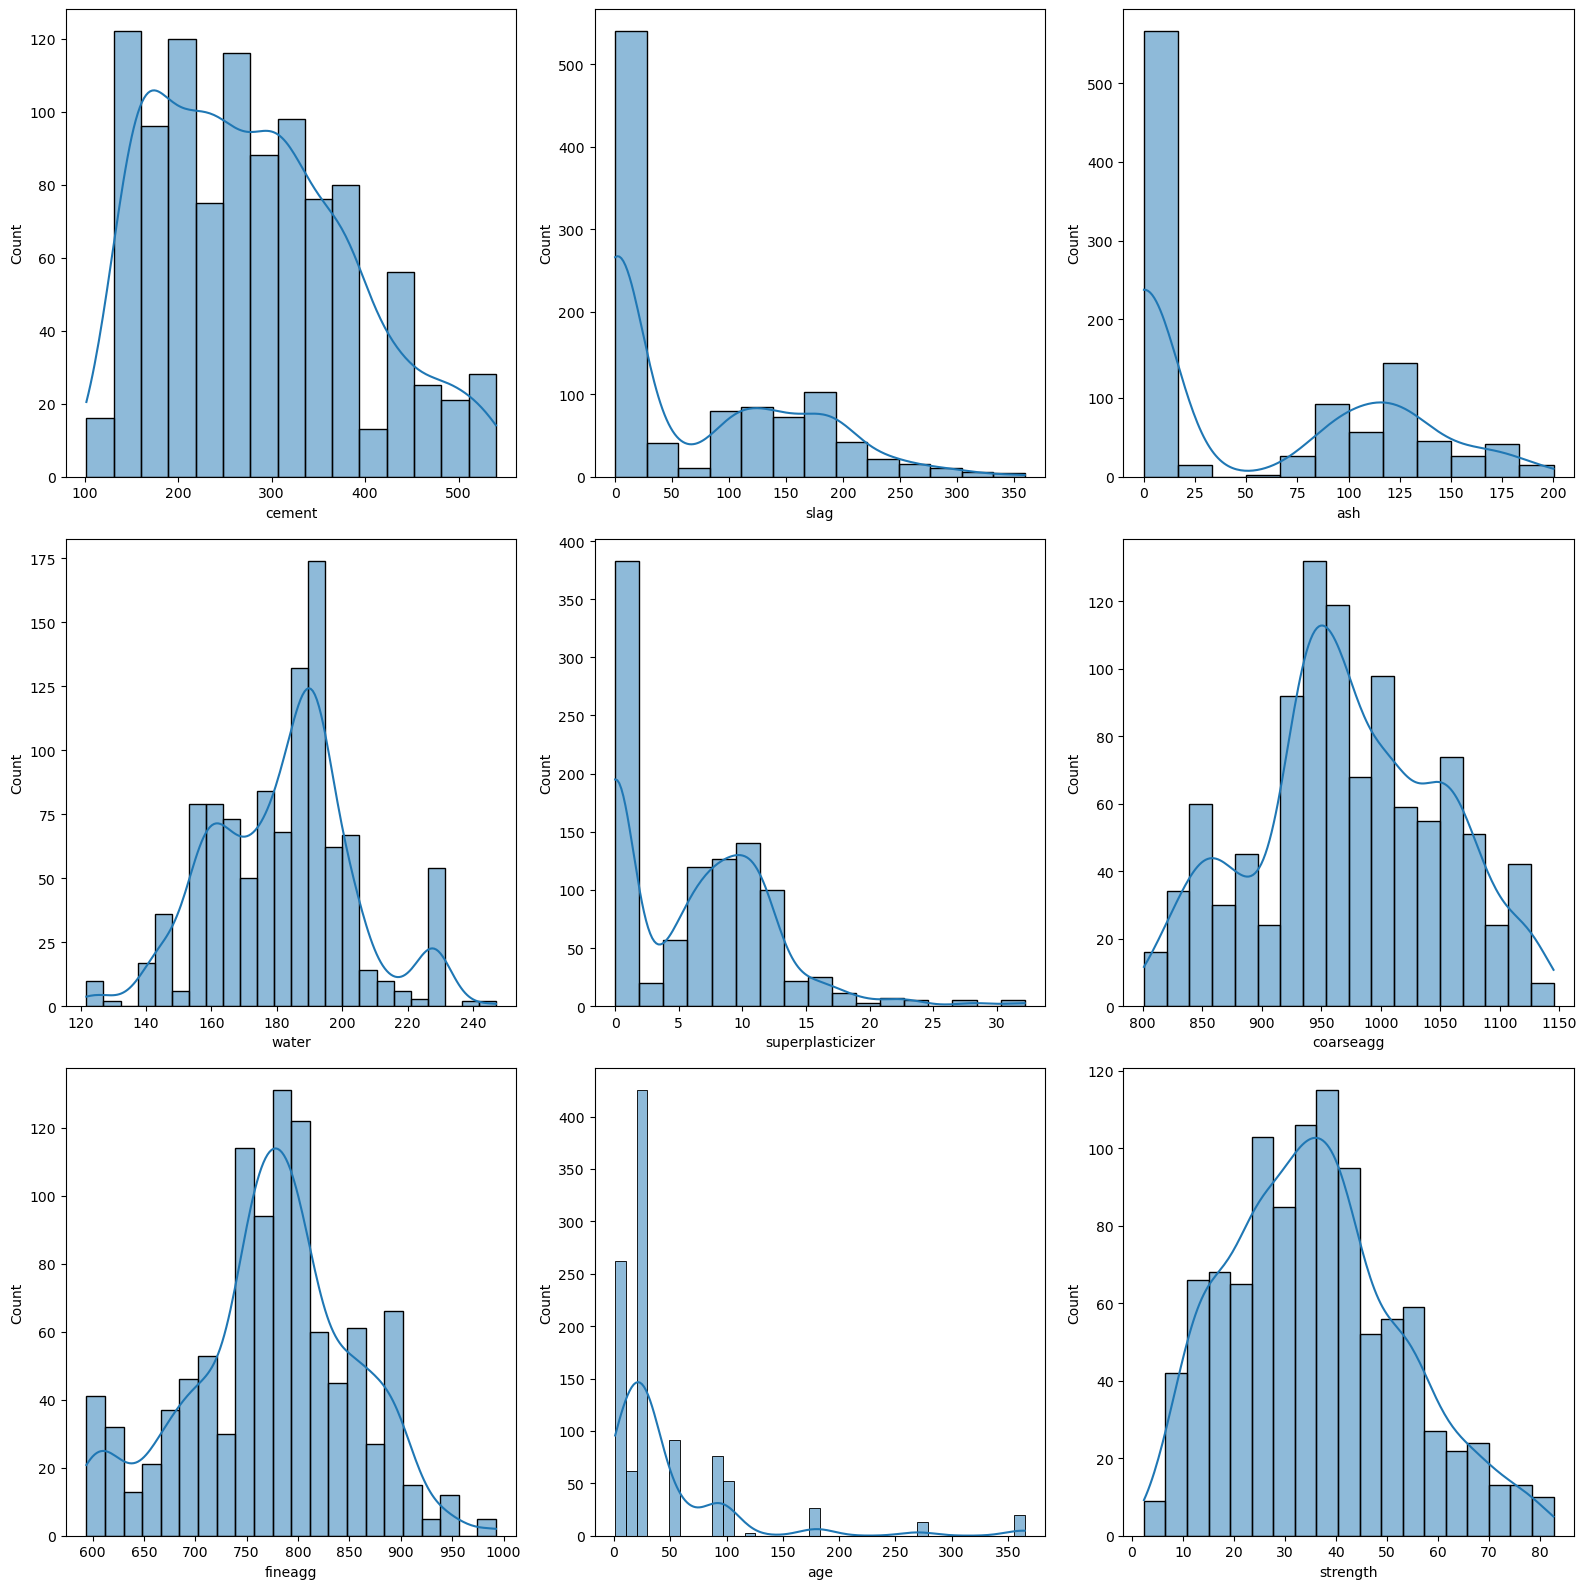

In [44]:
plt.show()

## Multi Variance Analysis

## 🔎 Pairwise Feature Relationships

A pairplot is used to visualize the relationships between all numerical features in the dataset.  
It enables the identification of:

- Linear and non-linear trends
- Direction and strength of relationships
- Potential multicollinearity
- Patterns that may influence model performance

Diagonal plots represent univariate distributions, while off-diagonal plots represent bivariate relationships.


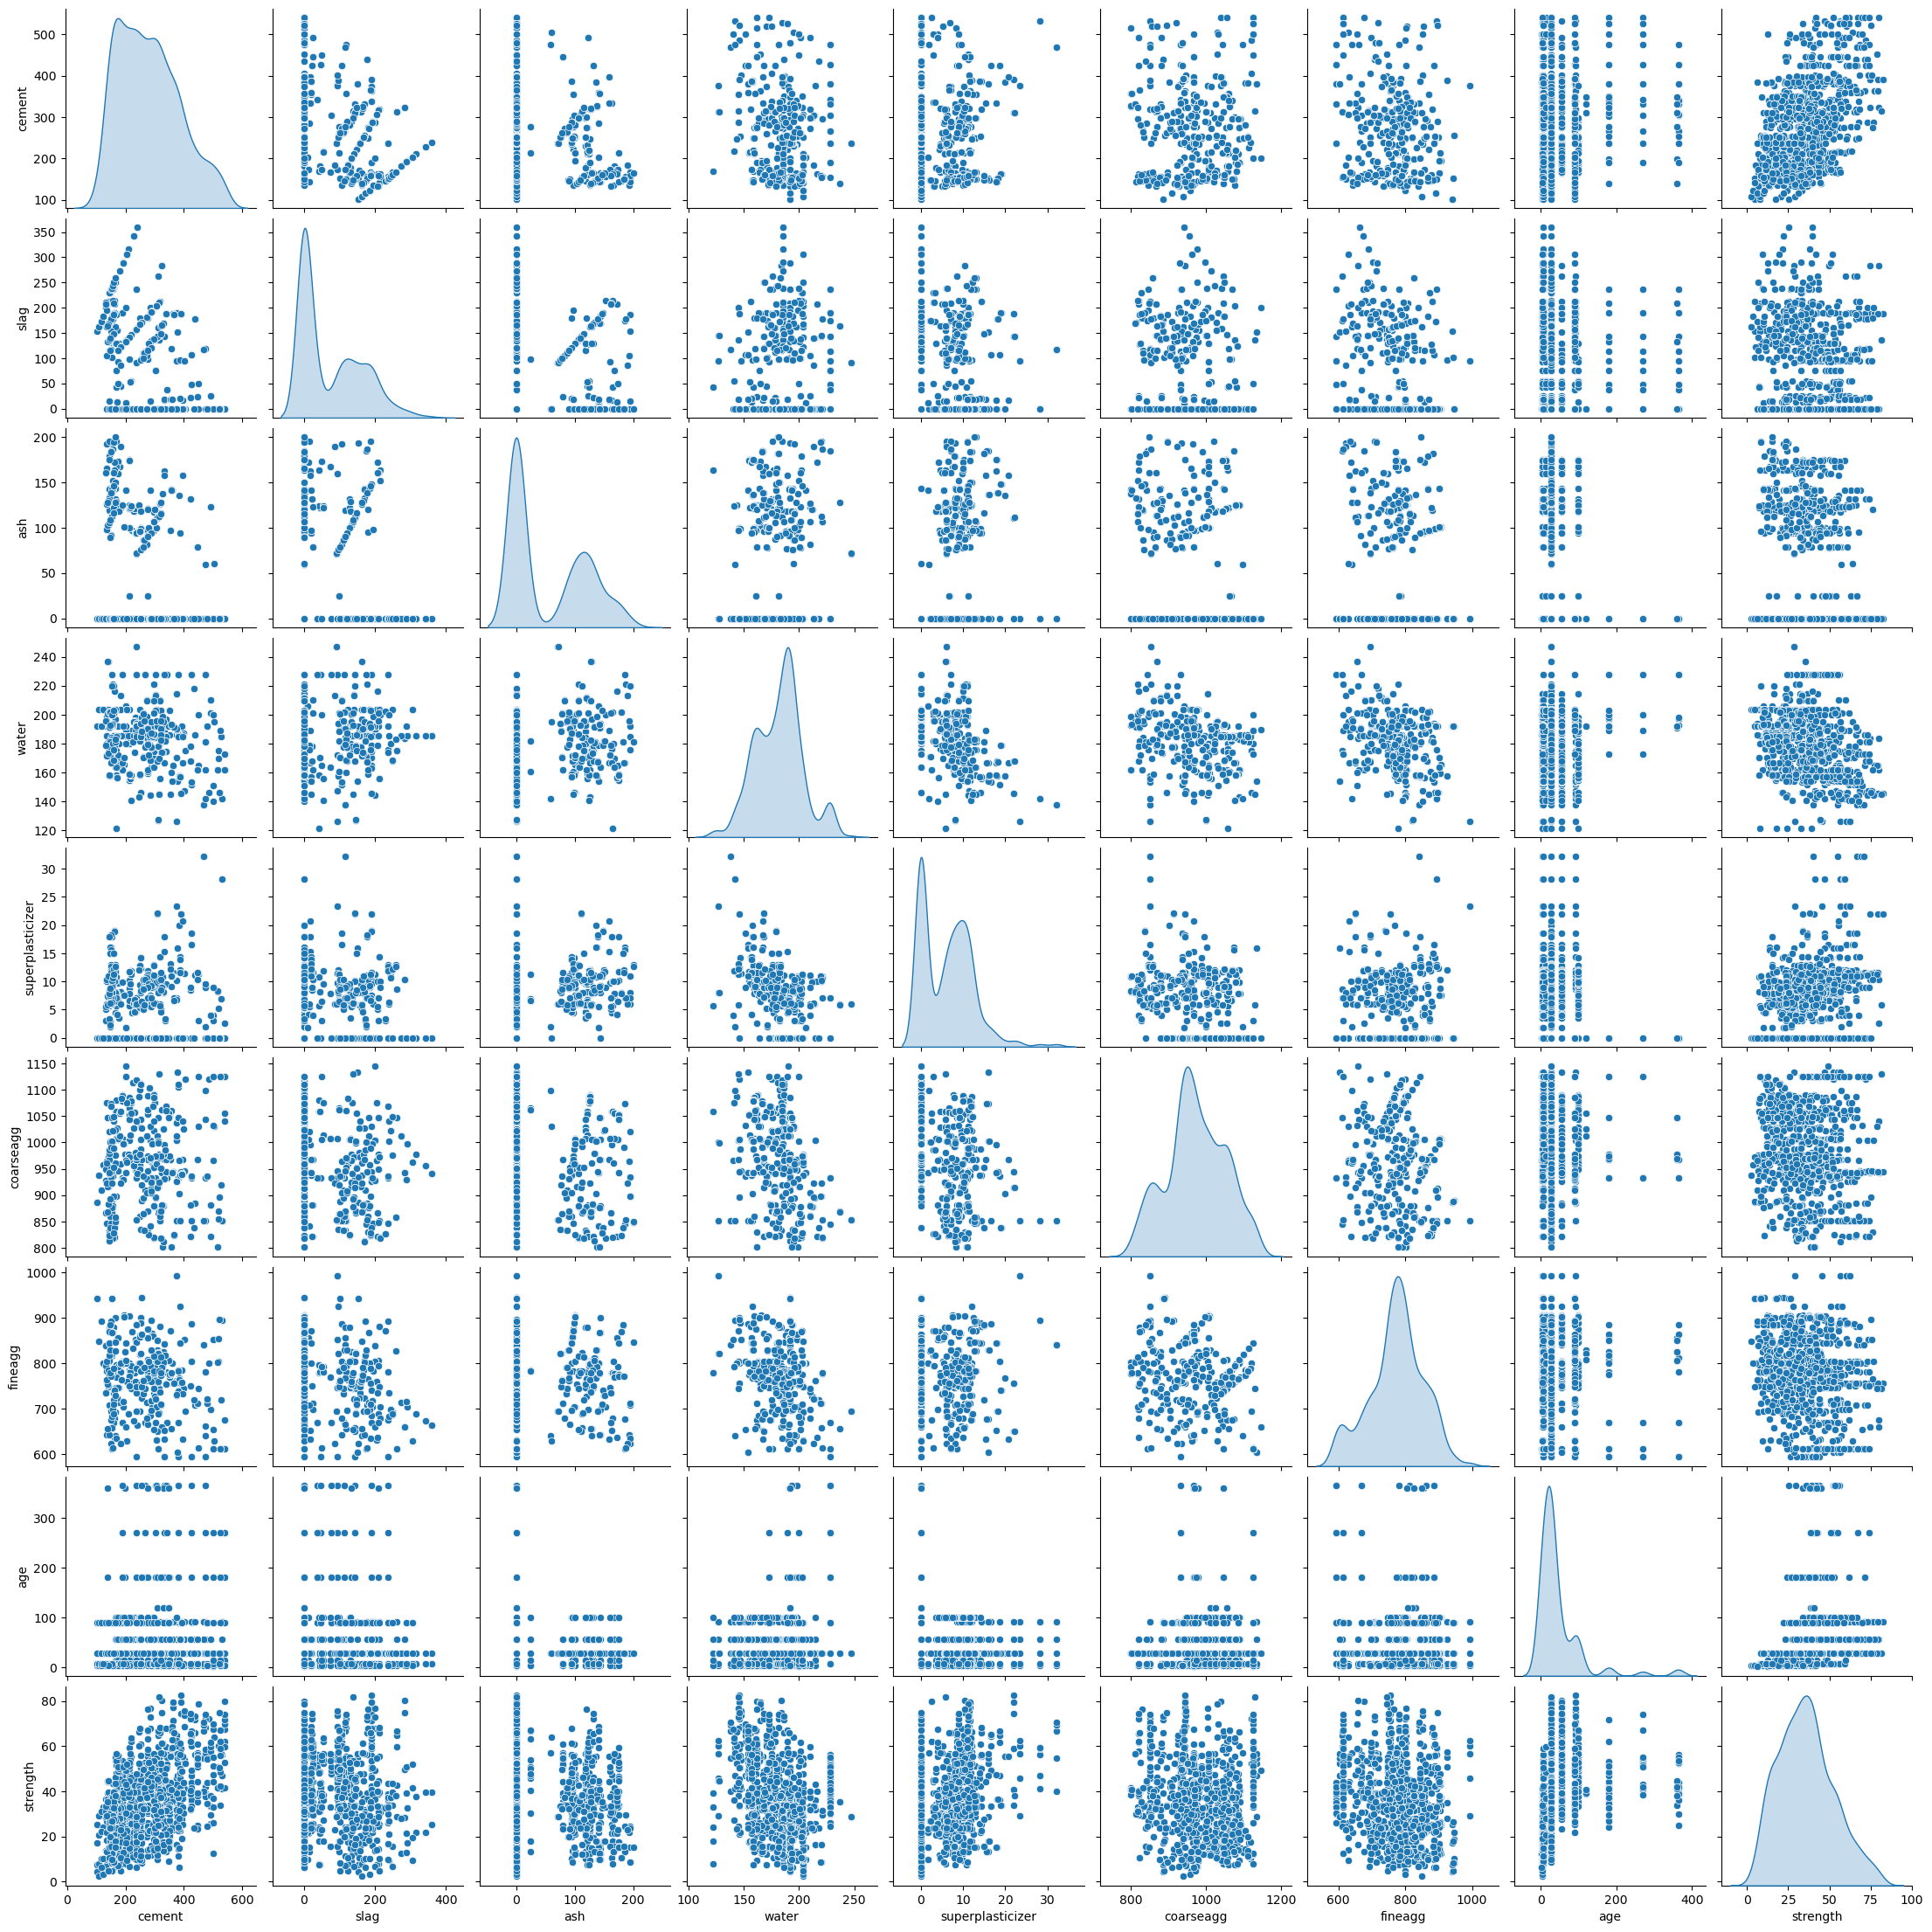

In [45]:
sns.pairplot(df, diag_kind = 'kde')
plt.show()

### Key Observations

- Strong positive relationships are observed between cement, age, and strength.
- Water content shows an inverse relationship with strength.
- Some feature pairs show weak or no visible correlation.


## 🔗 Correlation Analysis

A correlation heatmap is used to examine linear relationships between variables and detect multicollinearity.

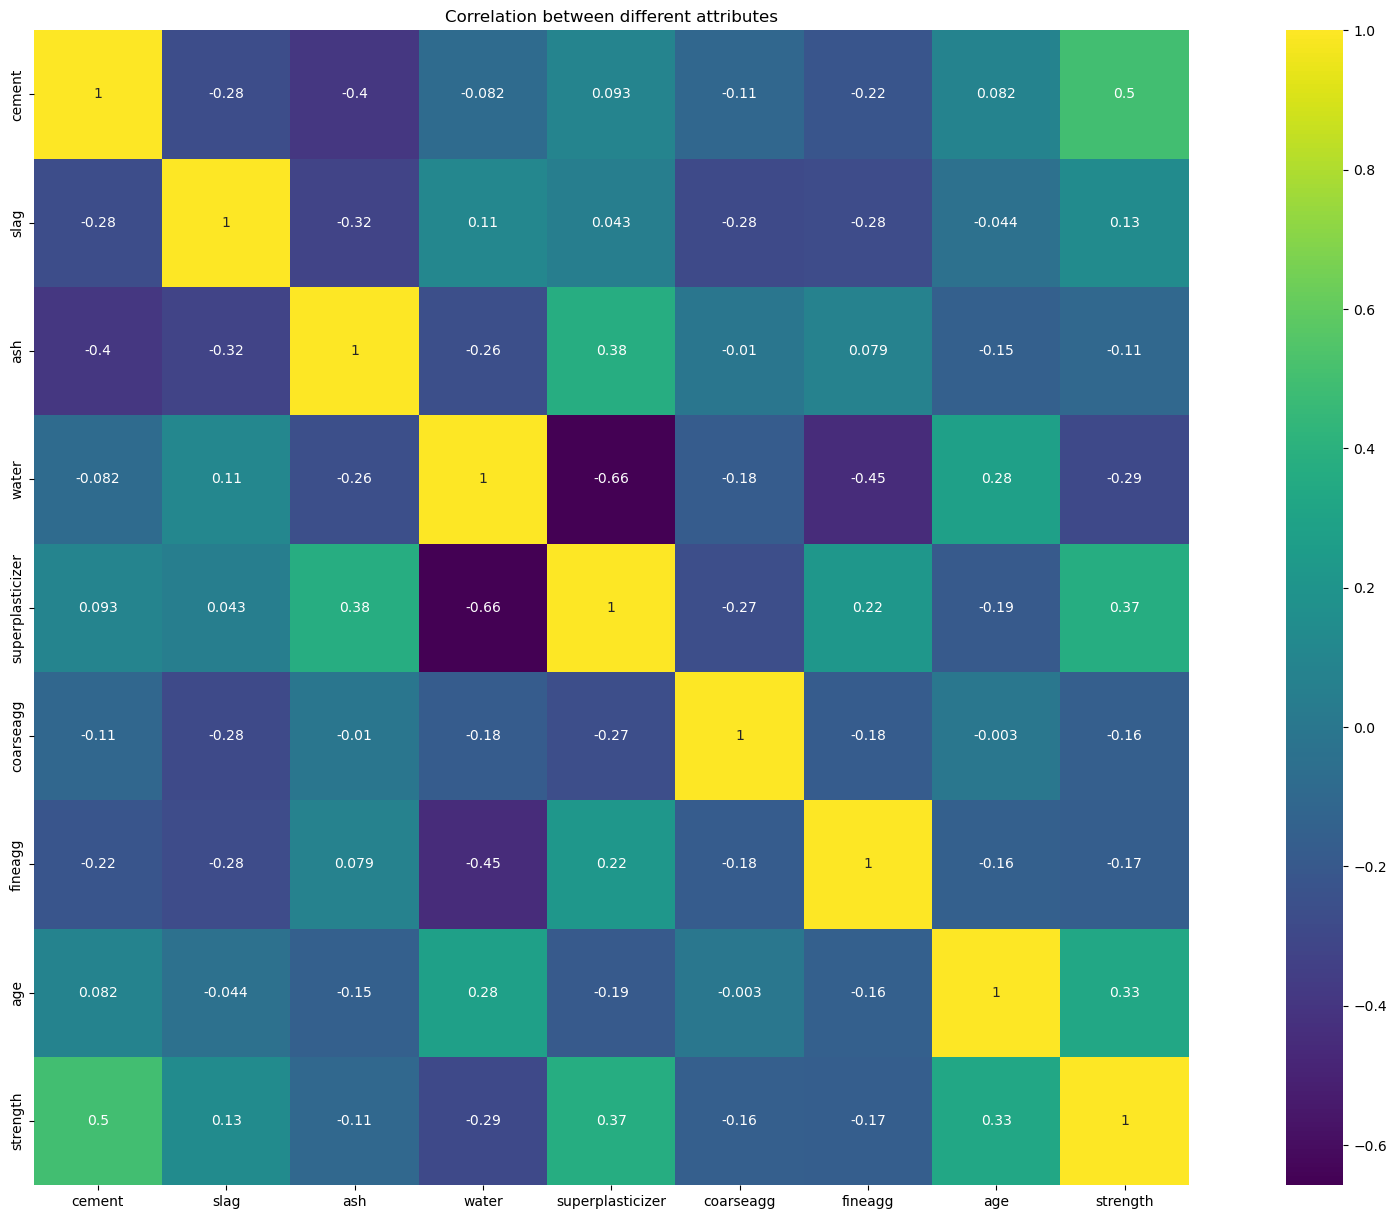

In [46]:
plt.figure(figsize = (25, 15))
sns.heatmap(df.corr(), vmax = 1, annot = True, square = True, cmap = 'viridis')
plt.title('Correlation between different attributes')
plt.show()

## 📦 Outlier Detection Using Boxplots

Boxplots are used to visually identify potential outliers using the Interquartile Range (IQR) method.


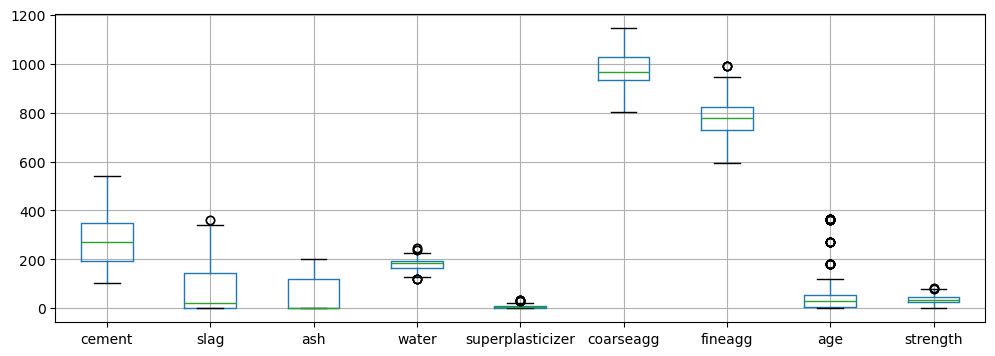

In [47]:
df.boxplot(figsize = (12, 4))
plt.show()

In [48]:
print('Outliers in Cement: ', df[((df.cement - df.cement.mean()) / df.cement.std()).abs() > 3]['cement'].count())
print('Outliers in slag: ', df[((df.slag - df.slag.mean()) / df.slag.std()).abs() > 3]['slag'].count())
print('Outliers in Ash: ', df[((df.ash - df.ash.mean()) / df.ash.std()).abs() > 3]['ash'].count())
print('Outliers in water: ', df[((df.water - df.water.mean()) / df.water.std()).abs() > 3]['water'].count())
print('Outliers in superplasticizer: ', df[((df.superplasticizer - df.superplasticizer.mean()) / df.superplasticizer.std()).abs() > 3]['superplasticizer'].count())
print('Outliers in courseagg: ', df[((df.coarseagg - df.coarseagg.mean()) / df.coarseagg.std()).abs() > 3]['coarseagg'].count())
print('Outliers in fineagg: ', df[((df.fineagg - df.fineagg.mean()) / df.fineagg.std()).abs() > 3]['fineagg'].count())
print('Outliers in age: ', df[((df.age - df.age.mean()) / df.age.std()).abs() > 3]['age'].count())

Outliers in Cement:  0
Outliers in slag:  4
Outliers in Ash:  0
Outliers in water:  2
Outliers in superplasticizer:  10
Outliers in courseagg:  0
Outliers in fineagg:  0
Outliers in age:  33


## 🚨 Outlier Handling Strategy

Outliers were identified using the Interquartile Range (IQR) method:

- Lower bound: Q1 − 1.5 × IQR
- Upper bound: Q3 + 1.5 × IQR

Rather than removing rows, outliers were capped using the median value to preserve dataset size and reduce the impact of extreme values.


In [49]:
for cols in df.columns[ : -1]:
    Q1 = df[cols].quantile(q = 0.25)
    Q3 = df[cols].quantile(q = 0.75)
    iqr = Q3 - Q1

    low = Q1 - 1.5 * iqr
    high = Q3 + 1.5 * iqr

    df[cols] = df[cols].astype(float)

    df.loc[(df[cols] < low) | (df[cols] > high)] = df[cols].median()

C:\Users\Umar\AppData\Local\Temp\ipykernel_19388\3371080000.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.65' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[cols] < low) | (df[cols] > high)] = df[cols].median()


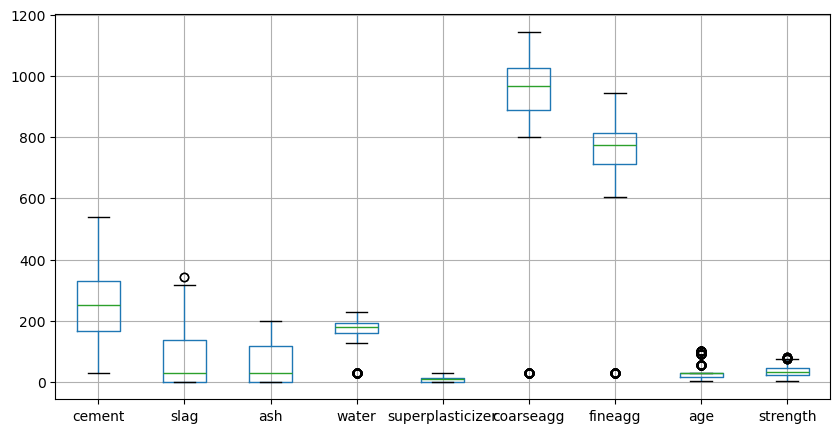

In [50]:
df.boxplot(figsize = (10 , 5))
plt.show()

## 🛠️ Data Preprocessing Summary

The following preprocessing steps were applied:

- Column names were simplified for improved code readability
- Outliers were identified and treated using median capping
- Data types were reviewed to ensure numerical consistency
- No missing values were found in the dataset

## ✅ Conclusion

This exploratory data analysis provided valuable insights into the structure and behavior of the concrete strength dataset.  
Key relationships were identified, skewed distributions were observed, and outliers were handled appropriately.

The dataset is now well-prepared for feature engineering and predictive modeling in future work.


## 🚀 Next Steps

- Feature scaling and normalization
- Train regression models to predict compressive strength
- Evaluate model performance using appropriate metrics
